In [1]:
%matplotlib inline  
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

*Roberto Maestre*
Based on the dataset from https://github.com/mattnedrich/GradientDescentExample/blob/master/data.csv

Gradient descent study. We will fit a simple lineal model ($y = mx + b $) to a given data set $D=(x^N,y^N)$ of points where $x,y \in R_2$

Firstly **we need to find the paramters $m, b$ because are unknown** (are the paramters of our model) and $x, y$ are given by the dataset.

Secondly, **the cost function should be defined** in order to "meassure" if two values for parameters $m, b$ are a good or bad solution. Therefore, we define the **cost function** as follows:
$$ E(m,b) = \frac{1}{N} \sum^{i=1}_{N} (y_i - (mx_i + b)) $$

Let's plot this function

In [2]:
def E(m,b):
    """
    The cost function for our model
    """
    global points
    N = float(len(points))
    error = 0
    for point in points:
        error += (point[0]-(m*point[1] + b)) ** 2
    return error / N

Read data points

In [3]:
points = genfromtxt("data.csv", delimiter=",")

Plot the data points

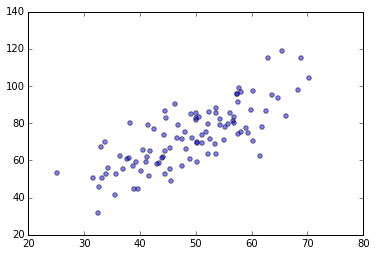

In [4]:
data_X = [p[0] for p in points]
data_Y = [p[1] for p in points]
plt.scatter(data_X, data_Y, alpha=0.5)

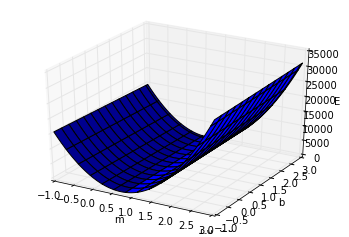

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m = arange(-1, 3, 0.03) # m data points
b = arange(-1, 3, 0.03) # b data points
X, Y = meshgrid(m, b)

zs = array([E(x,y) for x,y in zip(ravel(X), ravel(Y))])
Z = zs.reshape(X.shape) # Surface

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z) #plot

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('E')

In the above function we can see clearly a function minimum. Some values for $m,b$ has more error than other $m,b$ values e.g.: $E(m=0.5, b=-0.5) < E(m=-1.0,b=3.0)$

Therefore, we will start from one given point $m,b$ and we will go downhill to find the $m,b$ with lowest $E$ (error) function value.

To do that, we need to diferenciate our function $E$, since our function $E$ has two parameters $m,b$ we must compute two partial derivates:

$$ \frac{\partial}{\partial m} = \frac{2}{N} \sum_{i=1}^{N} - x_i (y_i - (mx_i+b))$$

$$ \frac{\partial}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} - (y_i - (mx_i+b))$$

We will use these functions to calculate "steps" to move $m,b$ closer to the minimum point of the function $E$, thus, we will perform $M$ steps to find these values. 

The main idea is **update** $m$ and $b$ in each step using the above functions and the **update** will be controlled by a "smoothing" factor or learning rate factor $\alpha$. In a more formal way we show compute the next formulas:

&nbsp;&nbsp;&nbsp;Step 0: $m = \text{random value}$

&nbsp;&nbsp;&nbsp;Step 1: $b = \text{random value}$

&nbsp;&nbsp;&nbsp;Step 2: $ m = m - (\frac{2}{N} \sum_{i=1}^{N} - x_i (y_i - (mx_i+b))) * \alpha  $

&nbsp;&nbsp;&nbsp;Step 3: $ b = b - (\frac{2}{N} \sum_{i=1}^{N} - (y_i - (mx_i+b))) * \alpha  $

&nbsp;&nbsp;&nbsp;Step 4: Go to Step 2


Let's define a python function to do it:

In [6]:
def step_gradient(m,b,points, alpha = 0.00005):
    """
    Calculate the drop of each parameter in the function (m,b)
    by means of the derivate functions
    """
    N = float(len(points))
    m_descend = 0.0
    b_descend = 0.0
    for point in points:
        m_descend += -(2/N) * point[0]*(point[1]-((m*point[0]) + b))
        b_descend += -(2/N) * (point[1]-((m*point[0]) + b))
    m_descend = m - (m_descend * alpha)
    b_descend = b - (b_descend * alpha)
    return (m_descend, b_descend)

As we can see in the above method, we compute the derivate function for each parameter $m, b$ and smoothing the "step descense" through learning ratio $\alpha$ we are going to obtain a new values for $m,b$.

In [7]:
iterations_number = 100
precision = 0.00001
m_old = -2
b_old = 0
parameter_its = [(m_old, b_old)]
for iteration in xrange(0, iterations_number):
    m_new,b_new = step_gradient(m_old,b_old,points)
    parameter_its.append((m_new,b_new))
    if (abs(m_old-m_new)) < precision:
        print("Breaking iterations in (%s it), no more precission achieved" % iteration)
        break
    m_old = m_new
    b_old = b_new

Breaking iterations in (40 it), no more precission achieved


The next plot shows the best line (model parameters optimization) for the given data set

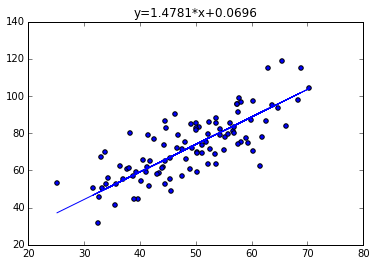

In [8]:
def plot_points_and_modelfit(m,b,toFile=False,iteration=0):
    """
    """
    ablineValues = []
    for x in data_X:
        ablineValues.append(m*x+b)

    plt.scatter(data_X,data_Y)
    plt.plot(data_X, ablineValues, 'b')
    plt.title("y=%s*x+%s" % (round(m_new,4),round(b_new,4)))
    if toFile:
        plt.savefig('/tmp/tmp_%s.png' % iteration, bbox_inches='tight')
    else:
        plt.show()
    
plot_points_and_modelfit(m_new,b_new)

Lets see all parameters values while optimization method are running

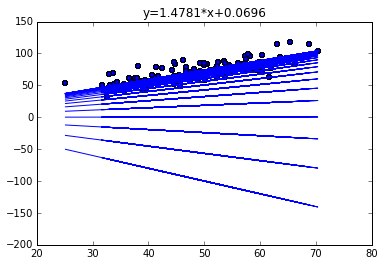

In [9]:
for parameter in parameter_its:
    plot_points_and_modelfit(parameter[0],parameter[1], True)